In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [236]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [237]:
def check_dong(df):
    if '아' in df:
        return '구의동'
    elif '군자로' in df:
        return '군자동'
    elif '뚝' in df:
        return '자양동'
    elif '광장' in df:
        return '광장동'
    elif '광나' in df:
        return '구의동'
    elif '능' in df:
        return '능동'
    elif '답십' in df:
        return '중곡동'
    elif '구의' in df:
        return '구의동'
    elif '천호' in df:
        return '군자동'
    elif '강변' in df:
        return '구의동'
    elif '영화' in df:
        return '중곡동'
    elif '워커힐' in df:
        return '광장동'
    elif '자양' in df:
        return '자양동'
    elif '용마' in df:
        return '중곡동'
    elif '긴고' in df:
        return '중곡동'
    elif '동일' in df:
        return '군자동'
    elif '면목' in df:
        return '군자동'
    elif '구천' in df:
        return '광장동'
    elif '모진' in df:
        return '화양동'
    elif '성내' in df:
        return '구의동'
    elif '시민' in df:
        return '구의동'
    else:
        return df
    
    
def add_hour(df):

    if '10' in df:
        return '오전9시 ~ 오전12시'
    elif '11' in df:
        return '오전9시 ~ 오전12시'
    elif '12' in df:
        return '오후12시 ~ 오후15시'
    elif '13' in df:
        return '오후12시 ~ 오후15시'
    elif '14' in df:
        return '오후12시 ~ 오후15시'
    elif '15' in df:
        return '오후15시 ~ 오후18시'
    elif '16' in df:
        return '오후15시 ~ 오후18시'
    elif '17' in df:
        return '오후15시 ~ 오후18시'
    elif '18' in df:
        return '오후18시 ~ 오후21시'
    elif '19' in df:
        return '오후18시 ~ 오후21시'
    elif '20' in df:
        return '오후18시 ~ 오후21시'
    elif '21' in df:
        return '오후21시 ~ 오후00시'
    elif '22' in df:
        return '오후21시 ~ 오후00시'
    elif '23' in df:
        return '오후21시 ~ 오후00시'
    elif '1' in df:
        return '오전0시 ~ 오전3시'
    elif '2' in df:
        return '오전0시 ~ 오전3시'
    elif '3' in df:
        return '오전3시 ~ 오전6시'
    elif '4' in df:
        return '오전3시 ~ 오전6시'
    elif '5' in df:
        return '오전3시 ~ 오전6시'
    elif '6' in df:
        return '오전6시 ~ 오전9시'
    elif '7' in df:
        return '오전6시 ~ 오전9시'
    elif '8' in df:
        return '오전6시 ~ 오전9시'
    elif '9' in df:
        return '오전9시 ~ 오전12시'
    else:
        return '오전0시 ~ 오전3시'
    

def check_str(df):
        return df.split(' ')[0]
        
    

In [238]:
file = '단속현황.csv'
pd_data = pd.read_csv(file, encoding = 'UTF-8', header = [0])
cp_data = pd_data
cp_data.head()

,단속년도,단속시간,단속원금,단속동,단속장소,위반내용,견인지시
0,2015,6,40000,화양동,119-4,주정차금지,견인처리
1,2015,7,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인
2,2015,7,50000,구의동,동서울터미널 주차장앞,32조내지 34조위반,미견인
3,2015,8,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인
4,2015,8,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인


In [239]:
cp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473074 entries, 0 to 473073
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   단속년도    473074 non-null  int64 
 1   단속시간    473074 non-null  int64 
 2   단속원금    473074 non-null  int64 
 3   단속동     473074 non-null  object
 4   단속장소    473068 non-null  object
 5   위반내용    473074 non-null  object
 6   견인지시    473074 non-null  object
dtypes: int64(3), object(4)
memory usage: 25.3+ MB


In [240]:
cp_data.drop(['단속장소', '위반내용', '견인지시'], axis = 1, inplace = True)
cp_data

,단속년도,단속시간,단속원금,단속동
0,2015,6,40000,화양동
1,2015,7,40000,화양동
2,2015,7,50000,구의동
3,2015,8,40000,화양동
4,2015,8,40000,화양동
...,...,...,...,...
473069,2022,21,40000,구의동
473070,2022,21,40000,구의동
473071,2022,21,40000,구의동
473072,2022,22,40000,광장동


In [241]:
# data 2018~2022 부터 짜르기
cp_data = cp_data.set_index('단속년도')
cp_data = cp_data.loc[2018: , :]

In [242]:
cp_index = cp_data['단속동']
cp_index

단속년도
2018    광장동
2018    구의동
2018    중곡동
2018    중곡동
2018    중곡동
       ... 
2022    구의동
2022    구의동
2022    구의동
2022    광장동
2022    군자동
Name: 단속동, Length: 268091, dtype: object

In [243]:
cp_data['단속동(1)'] = cp_data['단속동'].apply(check_dong)
hold_data = cp_data['단속동(1)'].value_counts()

In [244]:
cp_data.drop(['단속동', '단속원금'], axis = 1, inplace = True)
cp_data

,단속시간,단속동(1)
단속년도,,
2018,1,광장동
2018,1,구의동
2018,1,중곡동
2018,1,중곡동
2018,1,중곡동
...,...,...
2022,21,구의동
2022,21,구의동
2022,21,구의동


In [245]:
cp_data = cp_data.astype(str)
cp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268091 entries, 2018 to 2022
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   단속시간    268091 non-null  object
 1   단속동(1)  268091 non-null  object
dtypes: object(2)
memory usage: 6.1+ MB


In [246]:
cp_data['단속시간(1)'] = cp_data['단속시간'].apply(add_hour)
cp_data.drop(['단속시간'], axis = 1, inplace = True)

In [247]:
hold_data = hold_data.reset_index()
hold_data.columns = ['지역', '단속동']
hold_data

,지역,단속동
0,구의동,73998
1,자양동,57465
2,중곡동,55819
3,군자동,22445
4,광장동,21566
5,화양동,20232
6,능동,16566


/tmp/ipykernel_6152/727033995.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  g3 = g2.pivot('단속시간', '단속동', '단속년도')


<Axes: xlabel='단속동', ylabel='단속시간'>

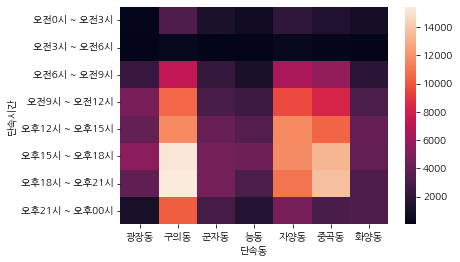

In [248]:
# 광진구 밤과 낮 어느 때가 더 많은가?  

recp_data = cp_data.reset_index()
g1 = recp_data.groupby(['단속동(1)', '단속시간(1)'])
g2 = g1.count().reset_index()
g2
g2.columns = ['단속동', '단속시간', '단속년도']
g3 = g2.pivot('단속시간', '단속동', '단속년도')

sns.heatmap(data = g3)

# 거주자들은 문제가 없다. 밖에서 유입,유출되는 차들에 대한 해결방안이 필요하다.

In [249]:
g5 = g3.drop(['광장동', '군자동', '능동', '화양동'], axis = 1)

g5 = g5.reset_index()
g5

단속동,단속시간,구의동,자양동,중곡동
0,오전0시 ~ 오전3시,3188,1949,1349
1,오전3시 ~ 오전6시,289,366,175
2,오전6시 ~ 오전9시,7421,6489,5717
3,오전9시 ~ 오전12시,10558,9592,8227
4,오후12시 ~ 오후15시,11658,11645,10400
5,오후15시 ~ 오후18시,15252,11742,13271
6,오후18시 ~ 오후21시,15433,10969,13675
7,오후21시 ~ 오후00시,10199,4713,3005


Text(0.5, 1.0, '중곡동')

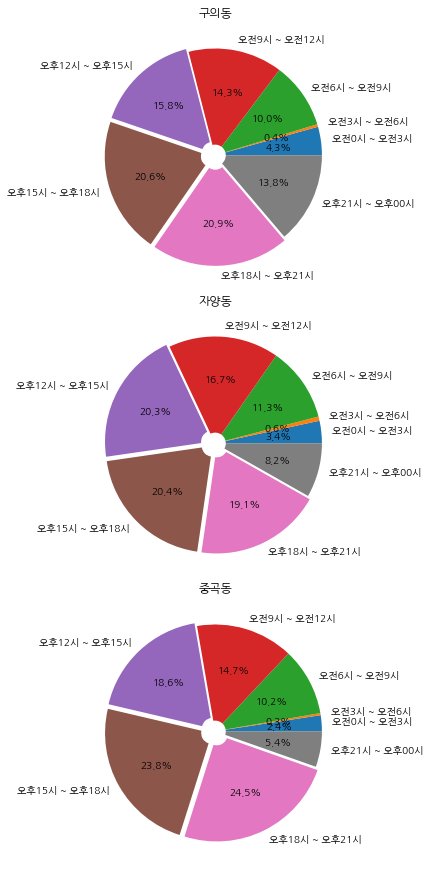

In [250]:
fig, axe = plt.subplots(3,1,figsize = (12,12), layout = 'constrained')

#explode를 위한 list
ex_array = np.zeros(len(g5['구의동']))
ex_array[-2] = 0.035
ex_array[-3] = 0.035
ex_array[-4] = 0.035

# pie차트
# 구의동
axe[0].pie(g5['구의동'], labels = g5['단속시간'], autopct='%1.1f%%', explode = ex_array,
           wedgeprops = dict(width=0.9))
axe[0].set_title('구의동')

axe[1].pie(g5['자양동'], labels = g5['단속시간'], autopct='%1.1f%%', explode = ex_array,
           wedgeprops = dict(width=0.9))
axe[1].set_title('자양동')

axe[2].pie(g5['중곡동'], labels = g5['단속시간'], autopct='%1.1f%%', explode = ex_array,
           wedgeprops = dict(width=0.9))
axe[2].set_title('중곡동')

In [251]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [252]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [253]:
file_2 = '광진구 입출입과 사업체 비교.xlsx'
com_data = pd.read_excel(file_2)
com_data.drop(0, axis = 0, inplace = True)

In [254]:
com_data = com_data.set_index('Unnamed: 0')
com_data = com_data.astype(np.int64)

In [255]:
com_data = com_data.reset_index()
com_data

,Unnamed: 0,유입,유출,사업체수,종사자수
0,2021,128565410,137145830,33706,129707
1,2020,131007260,139185450,35423,134230
2,2019,137382350,144983110,24445,126305
3,2018,138653280,143706705,24535,127879


In [256]:
# 유입과 사업체수의 상관도 보기
corr_in = np.corrcoef(com_data['유입'], com_data['사업체수'])[0,1]
print('유입과 사업체수 상관도 :', corr_in)

# 유입과 종사자수의 상관도 보기
corr_in_pop = np.corrcoef(com_data['유입'], com_data['종사자수'])[0, 1]
print('유입과 종사자수 상관도 :', corr_in_pop)

# 유출과 사업체수의 상관도 보기
corr_out = np.corrcoef(com_data['유출'], com_data['사업체수'])[0, 1]
print('유출과 사업체수 상관도 :', corr_out)

# 유출과 종사자수의 상관도 보기
corr_out_pop = np.corrcoef(com_data['유출'], com_data['종사자수'])[0, 1]
print('유출과 종사자수 상관도 :', corr_out_pop)

유입과 사업체수 상관도 : -0.941061603876338
유입과 종사자수 상관도 : -0.6694487012408264
유출과 사업체수 상관도 : -0.9311387348155268
유출과 종사자수 상관도 : -0.6970874098584291


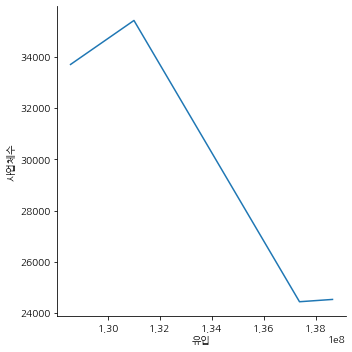

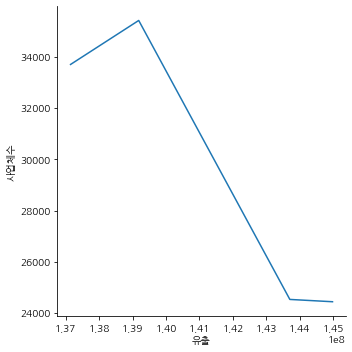

In [269]:
sns.relplot(data = com_data, x = '유입', y = '사업체수', kind = 'line')
sns.relplot(data = com_data, x = '유출', y = '사업체수', kind = 'line')

# 2020년을 기점으로 유출 유입 인구수가 급격하게 줄어들며 사업체수가 급격하게 증가하였다.

<Axes: xlabel='Unnamed: 0', ylabel='사업체수'>

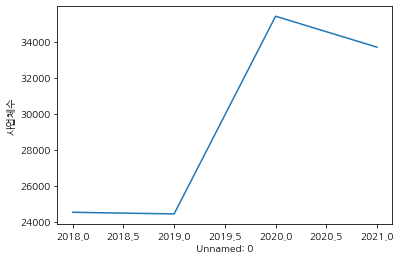

In [258]:
sns.lineplot(data = com_data, x = 'Unnamed: 0', y = '사업체수')

In [259]:
title = '광진구 동별 주차장 개소 v2 (주차 가능 차량 대수).csv'
re_data = pd.read_csv(title, encoding = 'UTF-8')
#re_data = re_data.unstack()
re_data = re_data.set_index('동별(3)')
#data_2022 = re_data.iloc[-1, :]
#data_2022 = data_2022.reset_index()
#data_2022.columns = ['지역', '주차가능대수']
#data_2022 = data_2022.reindex([4, 6, 2, 1, 5, 0, 3])
#data_2022

re_data.index.name = ''
re_data = re_data[['구의동', '자양동', '중곡동', '군자동', '광장동', '화양동', '능동']]
data_2022 = re_data.stack().reset_index()
data_2022.columns = ['연도', '지역', '차량대수']
data_2022

,연도,지역,차량대수
0,2018,구의동,3514
1,2018,자양동,3886
2,2018,중곡동,5428
3,2018,군자동,1040
4,2018,광장동,337
5,2018,화양동,1212
6,2018,능동,965
7,2019,구의동,3811
8,2019,자양동,3988
9,2019,중곡동,5917


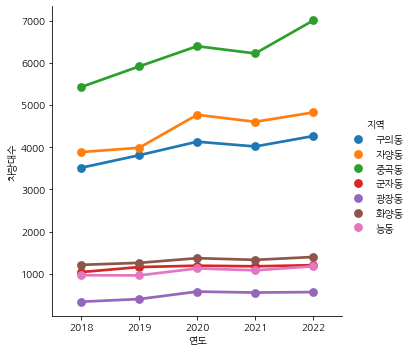

In [260]:
# 광진구 동마다 주차가능대수

g = sns.catplot(data = data_2022, x = '연도', y = '차량대수', hue = '지역', kind = 'point')

<Axes: xlabel='지역', ylabel='단속동'>

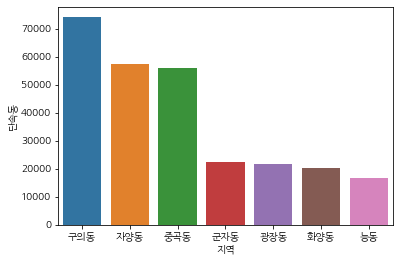

In [261]:
# 광진구 동마다 불법주정차 수

sns.barplot(data = hold_data, x = '지역', y = '단속동')

In [262]:
file_csv = '뚝섬3.csv'
Res_data = pd.read_csv(file_csv, encoding = 'UTF-8')
#Res_data = Res_data.set_index('Unnamed: 0')

#Res_data.index.name = ''
Res_data.drop(['주차대수', '날짜', 'Unnamed: 2', '조건1', 'Unnamed: 4'], axis = 1, inplace = True)
Res_data = Res_data.dropna()

In [263]:
Res_data.columns = ['주차대수', '날짜']

In [264]:
Res_data = Res_data.astype(str)
Res_data['년/월'] = Res_data['날짜'].apply(check_str)
Res_data.drop(['날짜'], axis = 1, inplace = True)
Res_data.drop([0], axis = 0, inplace = True)

In [266]:
Res_data = Res_data.sort_index(ascending = False)
Res_data = Res_data.reset_index()
Res_data.drop(['index'], axis = 1, inplace = True)

In [267]:
Res_data

,주차대수,년/월
0,15104.0,2020년01월
1,34501.0,2020년02월
2,73634.0,2020년03월
3,78110.0,2020년04월
4,89669.0,2020년05월
5,82585.0,2020년06월
6,78319.0,2020년07월
7,37285.0,2020년08월
8,62575.0,2020년09월
9,58533.0,2020년10월


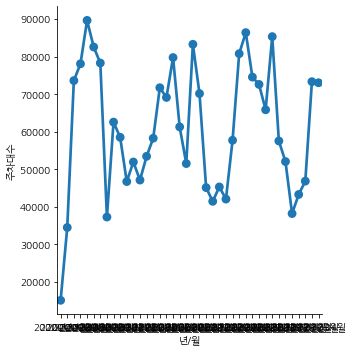

In [268]:
Res_data['주차대수'] = Res_data['주차대수'].astype(np.float64)

g = sns.catplot(data = Res_data, x = '년/월', y = '주차대수', kind = 'point')
